# 📘 **Introduction**

This analysis explore different customer characteristics and prepare this e-commerce dataset for a prediction model of the *Churn* (not retained customer). We want to identify behavioral patterns and work with machine learning models for classification problems like **Random Forest** and **XGBoost** to predict customer churn. 


# 📂 **Loading Data and Libraries**


In [482]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np
import warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [483]:
df = pd.read_csv("ecommerce_customer_data_custom_ratios.csv")

In [484]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [485]:
df.shape

(250000, 13)

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


## 🧹 **Cleaning**


### Drop nan and duplicates: 

In [487]:
df["Returns"].unique()

array([ 0.,  1., nan])

In [488]:
#Check for missing values
df.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [489]:
df.dropna(inplace=True)

In [490]:
df.isna().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

In [491]:
#Initial shape was: 250000 rows x 13 columns
df.shape


(202404, 13)

In [492]:
#Check for duplicates, we don't have any.
df.drop_duplicates(inplace=True)

### Columns

In [493]:
columns = { "Customer ID": "customer_id",
           "Purchase Date": "purchase_date",
           "Product Category": "category",
           "Product Price": "price",
           "Quantity": "quantity",
           "Total Purchase Amount": "total_purchase_amount",
           "Payment Method": "payment_method",
           "Customer Age": "customer_age",
           "Returns": "returns",
           "Customer Name": "customer_name",
           "Gender": "gender",
           "Churn" : "churn"
          }
df.rename(columns=columns, inplace=True)

In [494]:
df.drop(columns=["Age", "customer_name"], inplace=True)

In [495]:
df.head()

,customer_id,purchase_date,category,price,quantity,total_purchase_amount,payment_method,customer_age,returns,gender,churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,Female,1


### Formatting

In [496]:
#Convert purchase date to datetime for analysis
df["purchase_date"] = pd.to_datetime(df["purchase_date"])
df["purchase_date"] = df["purchase_date"].dt.date

In [497]:
df["purchase_date"].isna().sum()

0

In [498]:
df.dtypes

customer_id                int64
purchase_date             object
category                  object
price                      int64
quantity                   int64
total_purchase_amount      int64
payment_method            object
customer_age               int64
returns                  float64
gender                    object
churn                      int64
dtype: object

In [499]:
#Convert returns to int so we don't have to deal with null values
df["returns"] = df["returns"].astype(int)

In [500]:
df["returns"].unique()

array([0, 1])

### Best practice: copy

In [501]:
df = df.copy()

# 📊 **Exploratory Data Analysis (EDA)**


In [502]:
df.describe()

,customer_id,price,quantity,total_purchase_amount,customer_age,returns,churn
count,202404.000000,202404.000000,202404.000000,202404.000000,202404.000000,202404.000000,202404.000000
mean,25013.981962,254.377423,2.999269,2725.130813,43.926498,0.497861,0.199423
std,14412.553209,141.565500,1.414437,1441.540074,15.354491,0.499997,0.399568
min,1.000000,10.000000,1.000000,101.000000,18.000000,0.000000,0.000000
25%,12546.750000,132.000000,2.000000,1479.000000,31.000000,0.000000,0.000000
50%,25018.500000,254.000000,3.000000,2725.500000,44.000000,0.000000,0.000000
75%,37511.000000,377.000000,4.000000,3970.250000,57.000000,1.000000,0.000000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,1.000000


Checking different columns to understand behavior

In [503]:
df.groupby("returns")["category"].value_counts().reset_index() # 1 = return 0 = not returned

,returns,category,count
0,0,Clothing,30607
1,0,Books,30366
2,0,Electronics,20386
3,0,Home,20276
4,1,Books,30229
5,1,Clothing,30122
6,1,Electronics,20271
7,1,Home,20147


Distribution of churn between genders, checking this also for visualization

In [504]:
df.groupby("gender")["churn"].value_counts(normalize = True).reset_index() 

,gender,churn,proportion
0,Female,0,0.804279
1,Female,1,0.195721
2,Male,0,0.796831
3,Male,1,0.203169


Proportion of churn per category:

In [505]:
churn_cat= df.groupby(["category"])["churn"].value_counts(normalize = True).reset_index()

In [506]:
churn_cat.to_csv("churn_cat.csv") #For visualization

In [507]:
churn_cat.head()

,category,churn,proportion
0,Books,0,0.801485
1,Books,1,0.198515
2,Clothing,0,0.801347
3,Clothing,1,0.198653
4,Electronics,0,0.800674


We analyze more of this data from different points of view with the different columns we have: 

## Product Analysis

### Best seller: 

In [508]:
#best sellers - PLOT
best_seller= df["category"].value_counts().reset_index()

In [509]:
best_seller #For visualization

,category,count
0,Clothing,60729
1,Books,60595
2,Electronics,40657
3,Home,40423


### Returns frequency table: 

In [510]:
#return frequency of best sellers 
ret_count= df.groupby("returns")["category"].get_group(1).value_counts().reset_index()

In [511]:
#return proportion of bs 
ret_prop= df.groupby("returns")["category"].get_group(1).value_counts(normalize = True).reset_index()

In [512]:
#return frequency table per category - PLOT 
return_table= ret_count.merge(ret_prop, how='inner')

In [513]:
return_table #For visualization

,category,count,proportion
0,Books,30229,0.299983
1,Clothing,30122,0.298921
2,Electronics,20271,0.201163
3,Home,20147,0.199933


Returns per category, for visualization: 

In [514]:
prueba = df.groupby("returns")["category"].value_counts().reset_index()

In [515]:
prueba

,returns,category,count
0,0,Clothing,30607
1,0,Books,30366
2,0,Electronics,20386
3,0,Home,20276
4,1,Books,30229
5,1,Clothing,30122
6,1,Electronics,20271
7,1,Home,20147


In [516]:
pivot_df= prueba.pivot(index="category", columns= "returns", values = "count")

In [517]:
pivot_df.columns= ["no_returns(0)", "returns(1)"]

In [518]:
pivot_df.reset_index() #for visualization

,category,no_returns(0),returns(1)
0,Books,30366,30229
1,Clothing,30607,30122
2,Electronics,20386,20271
3,Home,20276,20147


In [519]:
merge= pd.merge(pivot_df, return_table, on= "category", how ="inner")

In [520]:
merge= pd.merge(best_seller, merge, on="category", how="inner")

In [521]:
merge

,category,count_x,no_returns(0),returns(1),count_y,proportion
0,Clothing,60729,30607,30122,30122,0.298921
1,Books,60595,30366,30229,30229,0.299983
2,Electronics,40657,20386,20271,20271,0.201163
3,Home,40423,20276,20147,20147,0.199933


In [522]:
df_returns= merge.drop(columns=["no_returns(0)","count_y"])

In [523]:
df_returns= df_returns.rename(columns={"count_x": "total_sales"})
df_returns= df_returns.rename(columns={"returns(1)": "returns_count"})
df_returns= df_returns.rename(columns={"proportion": "returns_percentage"})

In [524]:
df_returns.to_csv("df_returns.csv") #For visualization in PowerBI

### Outliers

In [525]:
num1 = df[["price","quantity","total_purchase_amount","customer_age","returns","churn"]]

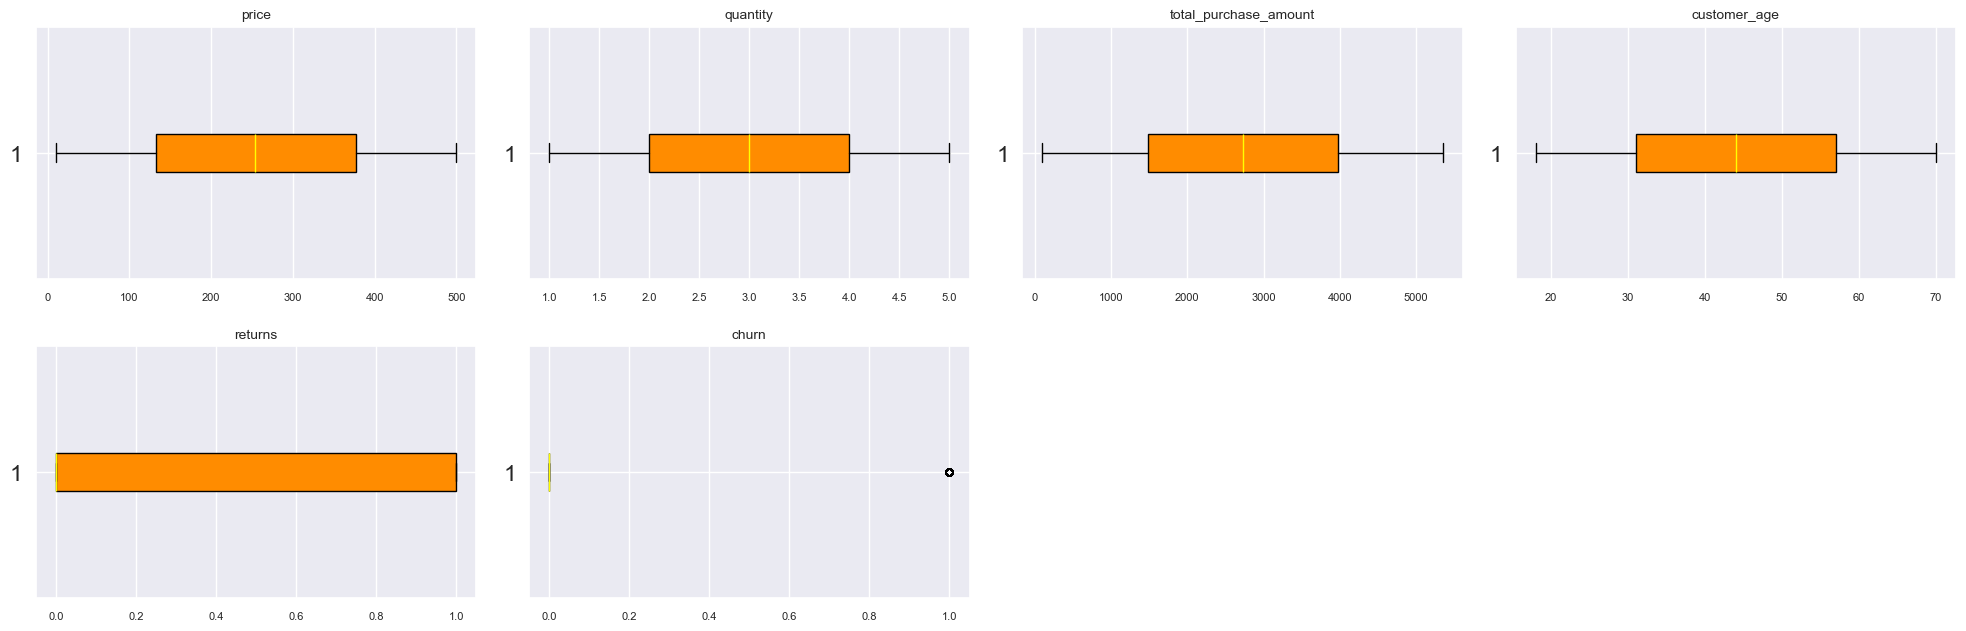

In [526]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num1.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num1.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num1.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()


# Inferential Statistics 

In [527]:
df.head()

,customer_id,purchase_date,category,price,quantity,total_purchase_amount,payment_method,customer_age,returns,gender,churn
0,46251,2020-09-08,Electronics,12,3,740,Credit Card,37,0,Male,0
1,46251,2022-03-05,Home,468,4,2739,PayPal,37,0,Male,0
2,46251,2022-05-23,Home,288,2,3196,PayPal,37,0,Male,0
3,46251,2020-11-12,Clothing,196,1,3509,PayPal,37,0,Male,0
4,13593,2020-11-27,Home,449,1,3452,Credit Card,49,0,Female,1


### Chi - test

In [528]:
from scipy.stats import chi2_contingency

In [529]:
crosstab_result = pd.crosstab(df['churn'], df["customer_age"])
alpha = 0.05

In [530]:
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_result)
p_value= chi2_pvalue


if p_value < alpha:
    print("Reject the Null Hypothesis: Significant result.")
else:
    print("Fail to Reject the Null Hypothesis: Not a significant result.")


Reject the Null Hypothesis: Significant result.


In [646]:
p_value

5.723662155931165e-27

### Pearson - Spearman

In [531]:
df['churn'].corr(df['customer_age']) # PEARSON

-0.0065206588890346475

In [532]:
df['churn'].corr(df['customer_age'], method='spearman')

-0.006534465263044716

In [533]:
num1 = df[["price","quantity","total_purchase_amount","customer_age","returns","churn"]]

In [534]:
spearman_correlations_sorted = num1.corrwith(df['churn'], method='pearson').sort_values(ascending=False) # positive ones
spearman_correlations_sorted

churn                    1.000000
returns                  0.001863
total_purchase_amount    0.001630
quantity                -0.002050
price                   -0.003309
customer_age            -0.006521
dtype: float64

In [535]:
num1.corrwith(df['churn'], method='spearman').sort_values(ascending=True)[:5] # negative ones

customer_age            -0.006534
price                   -0.003308
quantity                -0.002051
total_purchase_amount    0.001646
returns                  0.001863
dtype: float64

### Cramer

In [536]:
from scipy.stats.contingency import association 

In [537]:
cramer= association(crosstab_result, method='cramer')

In [538]:
cramer

0.03485374066576322

In [539]:
df.head()

,customer_id,purchase_date,category,price,quantity,total_purchase_amount,payment_method,customer_age,returns,gender,churn
0,46251,2020-09-08,Electronics,12,3,740,Credit Card,37,0,Male,0
1,46251,2022-03-05,Home,468,4,2739,PayPal,37,0,Male,0
2,46251,2022-05-23,Home,288,2,3196,PayPal,37,0,Male,0
3,46251,2020-11-12,Clothing,196,1,3509,PayPal,37,0,Male,0
4,13593,2020-11-27,Home,449,1,3452,Credit Card,49,0,Female,1


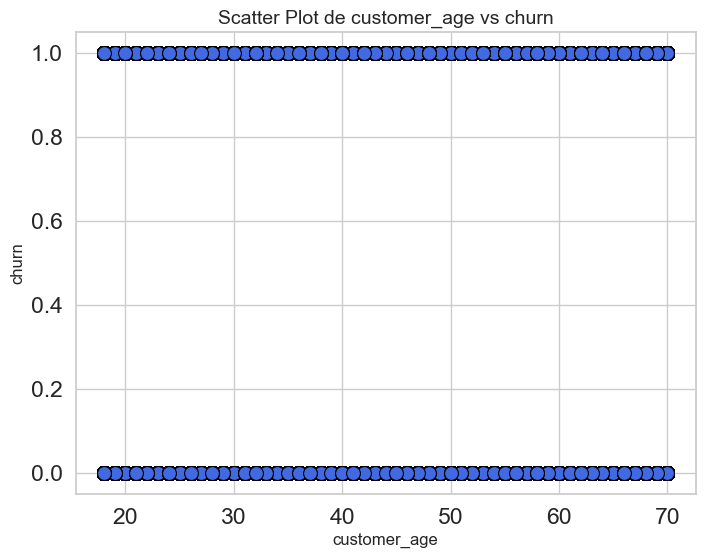

In [540]:
# Configurar el estilo del gráfico
sns.set_style("whitegrid")

# Crear el scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='customer_age', y='churn', data=df, color='royalblue', s=100, edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('customer_age', fontsize=12)
plt.ylabel('churn', fontsize=12)
plt.title('Scatter Plot de customer_age vs churn', fontsize=14)

# Mostrar el gráfico
plt.show()

### Correlation Matrix

In [541]:
cor= num1.corr()

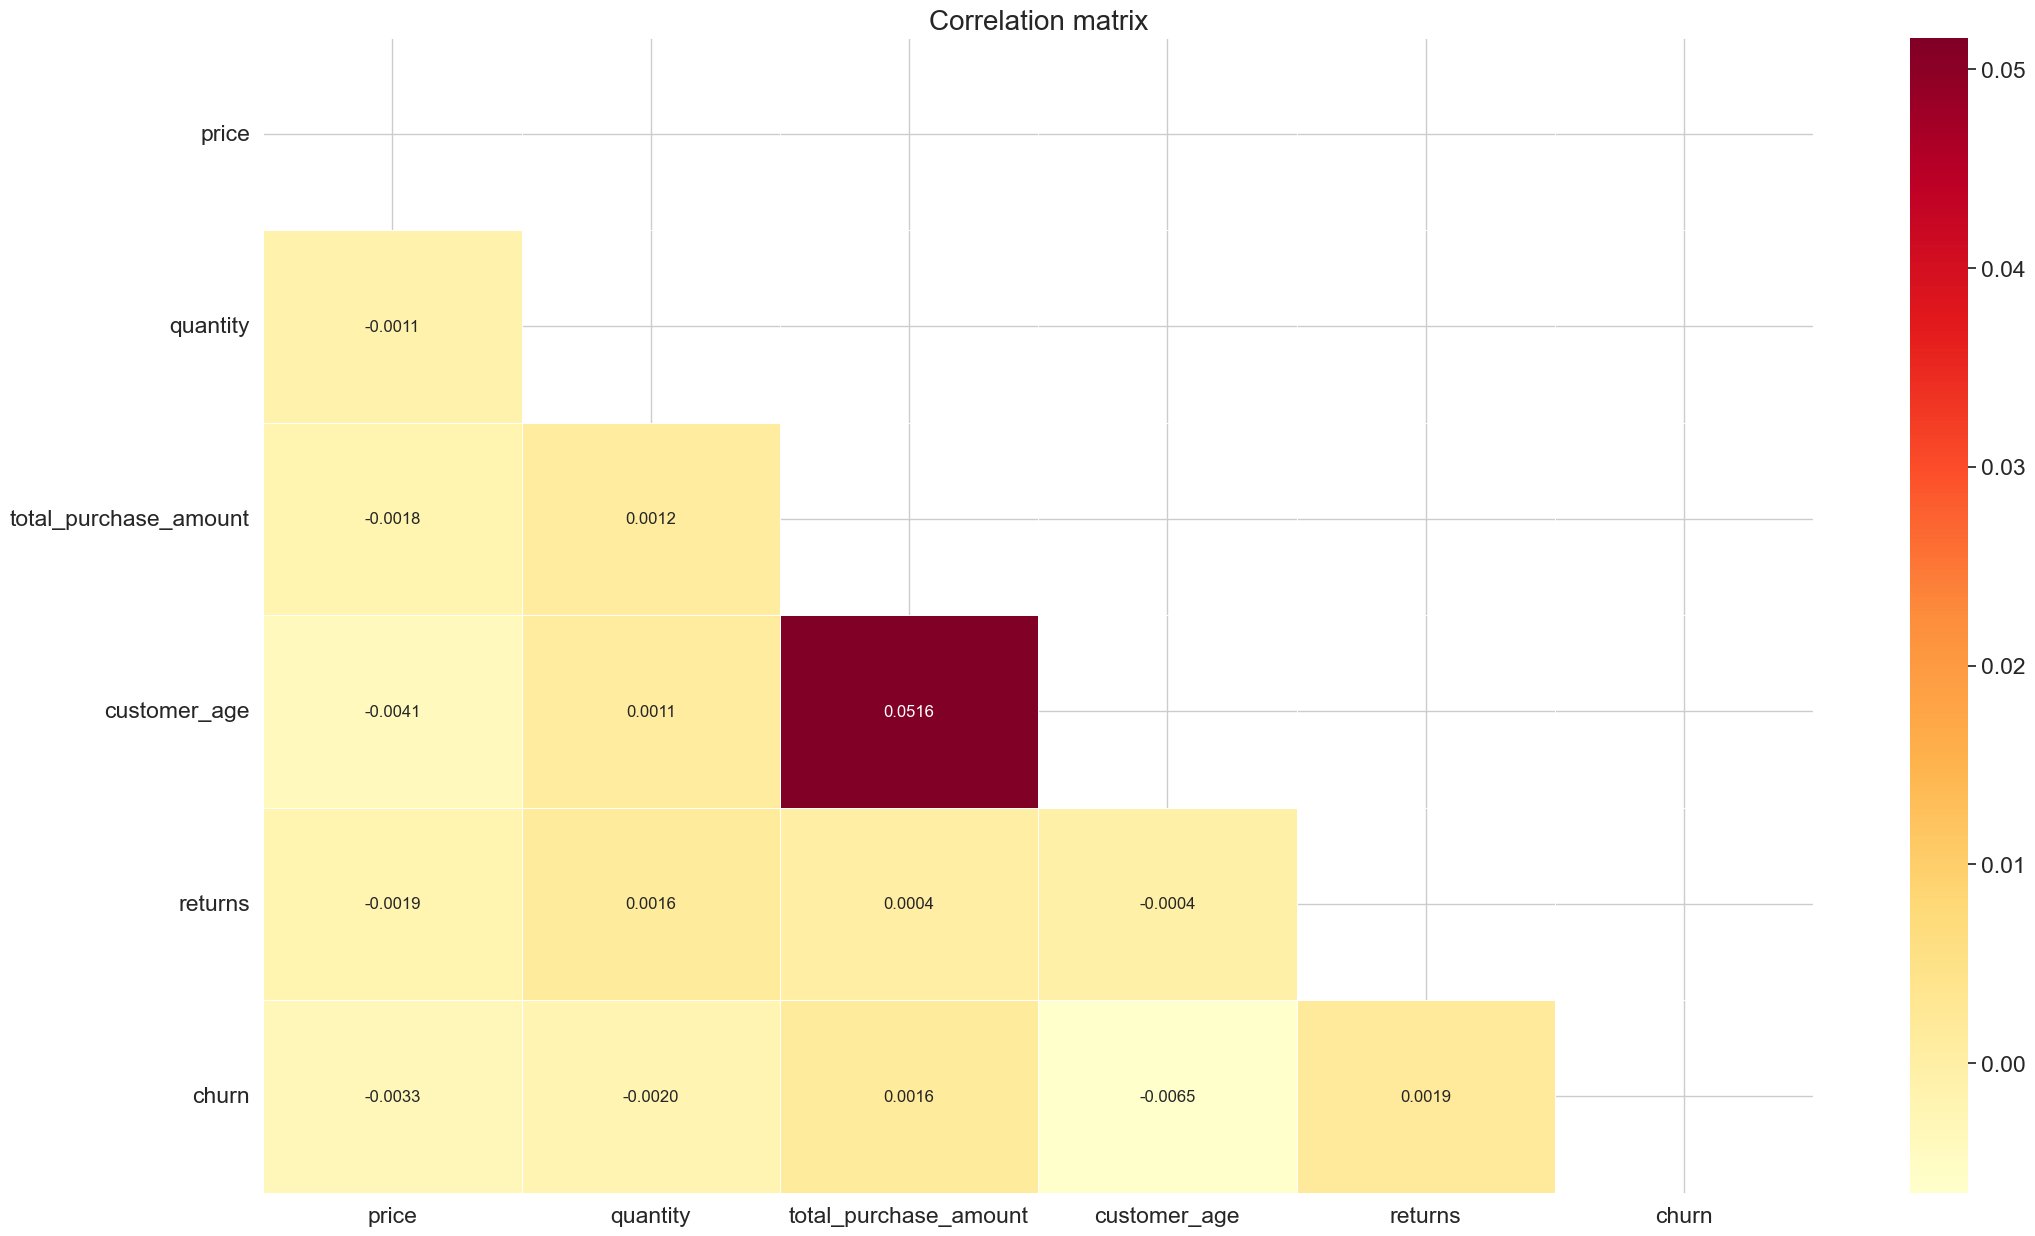

In [542]:
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(cor, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="YlOrRd", fmt=".4f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation matrix", fontsize=20) # add title
plt.show()

## 🛠️ **Feature Engineering: Churn**


In [543]:
df["churn"].value_counts(normalize=True).reset_index() #ratio:  8:2

,churn,proportion
0,0,0.800577
1,1,0.199423


In [544]:
df.groupby("category")["churn"].value_counts().reset_index()

,category,churn,count
0,Books,0,48566
1,Books,1,12029
2,Clothing,0,48665
3,Clothing,1,12064
4,Electronics,0,32553
5,Electronics,1,8104
6,Home,0,32256
7,Home,1,8167


For better analysis, crosstab: 

In [545]:
pd.crosstab(df["category"], df["churn"]) #0 = retention 1= churn

churn,0,1
category,,
Books,48566,12029
Clothing,48665,12064
Electronics,32553,8104
Home,32256,8167


We already check category, we're going to check one of the correlations: 

In [546]:
df["customer_age"].describe()

count    202404.000000
mean         43.926498
std          15.354491
min          18.000000
25%          31.000000
50%          44.000000
75%          57.000000
max          70.000000
Name: customer_age, dtype: float64

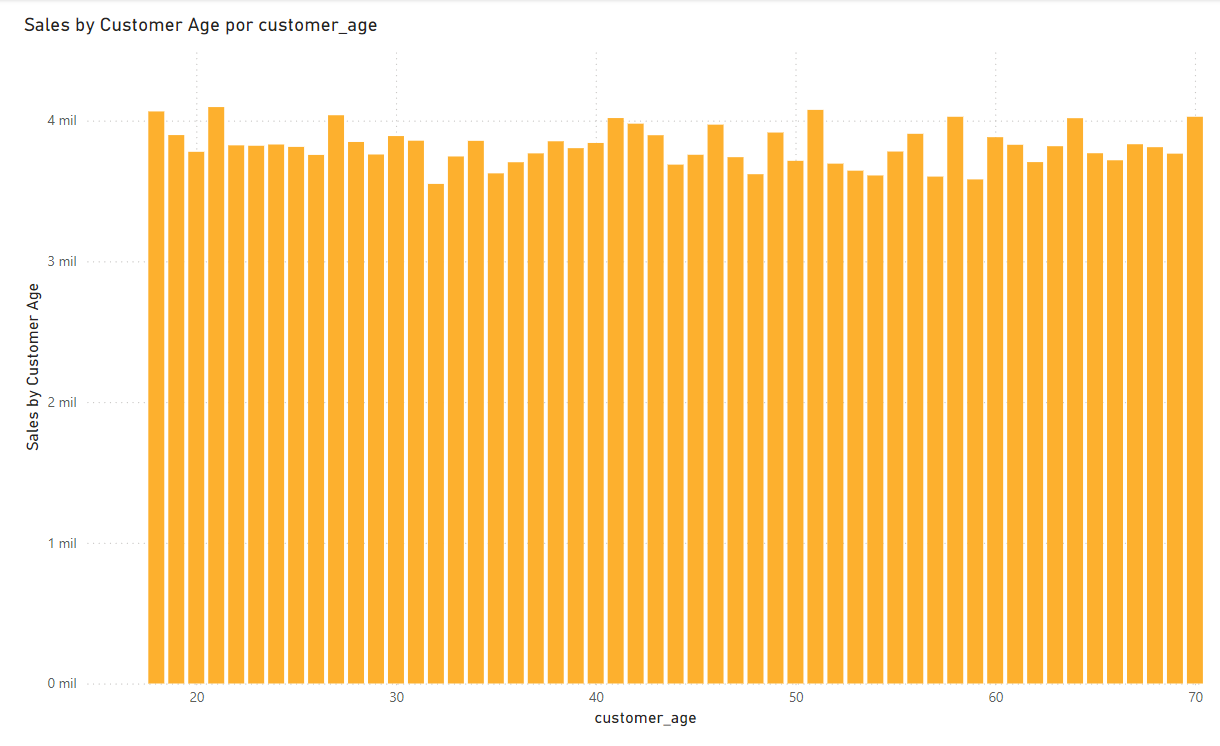

To do a deeper analysis, we need to visualize better how is the behavior of customers, so we did a segmentation per age: 

In [547]:
def classify_generation(age):
    if 18 <= age <= 25:
        return "Gen Z"
    elif 25 < age <= 44:
        return "Millennial"
    elif 44 < age <= 64:
        return "Gen X"
    elif 64 < age <= 70:
        return "Gen Boomer"
    else:
        return "Other"  # ages outside defined ranges¡

df['customer_generation'] = df['customer_age'].apply(classify_generation)

In [548]:
df["customer_generation"].value_counts() #reason why  not: there's less unique id values than transactions, to get a view of actual segmentation of customers, we need to look for unique customer_id per generation

customer_generation
Gen X         75887
Millennial    72472
Gen Z         31124
Gen Boomer    22921
Name: count, dtype: int64

Here we're going to able to see the sample of customers classified per generations:

In [549]:
segmentation= df.groupby('customer_generation')['customer_id'].nunique() 

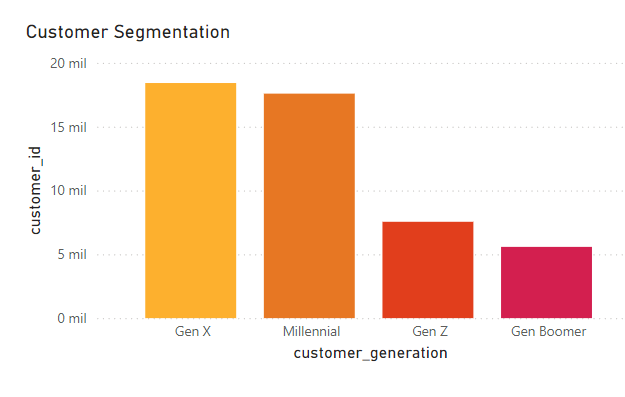

In [550]:
df.groupby("customer_generation")["churn"].value_counts(normalize=True).reset_index()

,customer_generation,churn,proportion
0,Gen Boomer,0,0.806248
1,Gen Boomer,1,0.193752
2,Gen X,0,0.800546
3,Gen X,1,0.199454
4,Gen Z,0,0.790290
5,Gen Z,1,0.209710
6,Millennial,0,0.803234
7,Millennial,1,0.196766


In [551]:
pd.crosstab(df["customer_generation"], df["churn"]) #0 = retention 1= churn

churn,0,1
customer_generation,,
Gen Boomer,18480,4441
Gen X,60751,15136
Gen Z,24597,6527
Millennial,58212,14260


For visualization, we're going to create graphics filtering data of just customers that are churns: 

In [552]:
churn_df = df[df['churn'] == 1]

In [553]:
churn_counts= churn_df.groupby(["category", "customer_generation"])["churn"].value_counts()

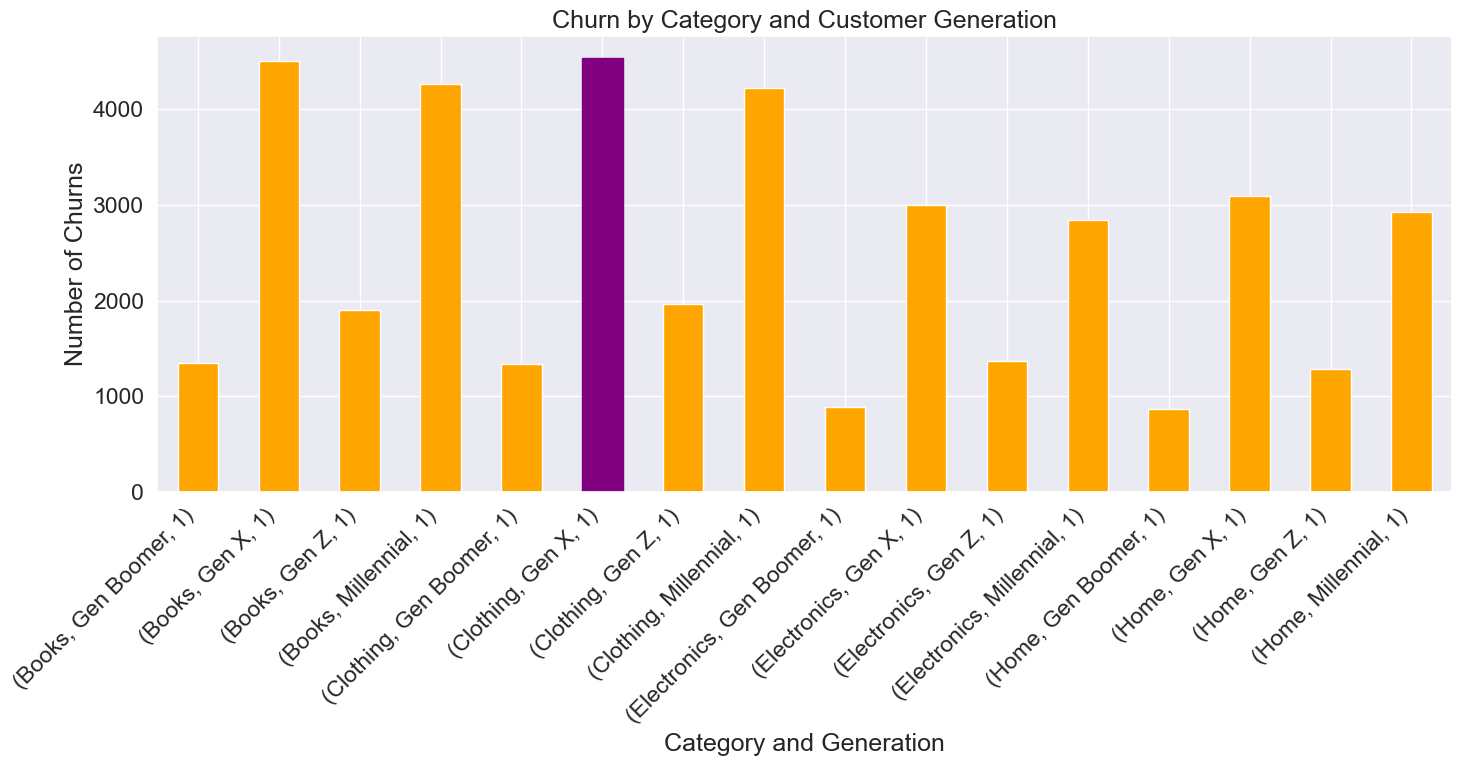

In [554]:
churn_counts.plot(kind='bar', stacked=True, figsize=(15, 8), color="orange")
plt.title('Churn by Category and Customer Generation')
plt.xlabel('Category and Generation')
plt.ylabel('Number of Churns')
plt.xticks(rotation=45, ha='right')


# Find the bar with the maximum value
max_value = churn_counts.max()
max_index = churn_counts.idxmax()

# Highlight the bar with the maximum value
try:
    index = churn_counts.index.get_loc(max_index)
    plt.gca().get_children()[index].set_color('purple')
except KeyError:
    print(f"Warning: Index for {max_index} not found.")

plt.tight_layout()
plt.show()

Checking also total_purchase_amount to see if we can generate a better way to explore this data: 

In [555]:
df["total_purchase_amount"].sort_values()

128819     101
127009     103
114794     105
186006     106
190555     107
          ... 
34981     5347
215351    5348
143126    5349
244598    5350
122795    5350
Name: total_purchase_amount, Length: 202404, dtype: int64

In [556]:
buy_beh = pd.qcut(df['total_purchase_amount'], q=4, labels=["Occasional", "Moderate", "Loyal", "VIP"])


In [557]:
df['buyer_type'] = buy_beh

df[['total_purchase_amount', 'buyer_type']].value_counts()


total_purchase_amount  buyer_type
2786                   Loyal         69
5013                   VIP           65
4939                   VIP           63
823                    Occasional    62
2728                   Loyal         61
                                     ..
5332                   VIP            1
124                    Occasional     1
5328                   VIP            1
103                    Occasional     1
101                    Occasional     1
Name: count, Length: 5244, dtype: int64

In [558]:
df["buyer_type"].value_counts()

buyer_type
Occasional    50633
Loyal         50601
VIP           50601
Moderate      50569
Name: count, dtype: int64

In [559]:
df_noencd= df.copy() #for more tests

# ML

Since PEarson Cramer  was saying that there are relationship between churn and customer age: 

## Encoding with get_dummies: 

In [560]:
encoded_generation = pd.get_dummies(df["customer_generation"], dtype=int)
df = pd.concat([df, encoded_generation], axis=1)
df = df.drop(columns=["customer_generation","customer_age"])

In [561]:
encoded_category = pd.get_dummies(df["category"], dtype=int)
df = pd.concat([df, encoded_category], axis=1)
df = df.drop(columns="category")

In [562]:
encoded_gender = pd.get_dummies(df["gender"], dtype=int)
df = pd.concat([df, encoded_gender], axis=1)
df = df.drop(columns="gender")

In [563]:
encoded_buyer = pd.get_dummies(df["buyer_type"], dtype=int)
df = pd.concat([df, encoded_buyer], axis=1)
df = df.drop(columns="buyer_type")

In [564]:
df =df.drop(columns=["purchase_date", "customer_id","payment_method", "total_purchase_amount"])

In [565]:
df.head()

,price,quantity,returns,churn,Gen Boomer,Gen X,Gen Z,Millennial,Books,Clothing,Electronics,Home,Female,Male,Occasional,Moderate,Loyal,VIP
0,12,3,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0
1,468,4,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,288,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
3,196,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
4,449,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0


In [566]:
df.corrwith(df['churn'], method='spearman').sort_values(ascending=False)

churn          1.000000
Gen Z          0.010974
Male           0.009320
Home           0.003270
VIP            0.002541
returns        0.001863
Moderate       0.000525
Gen X          0.000061
Electronics   -0.000122
Loyal         -0.001114
Clothing      -0.001262
Books         -0.001486
Occasional    -0.001952
quantity      -0.002051
price         -0.003308
Millennial    -0.004967
Gen Boomer    -0.005071
Female        -0.009320
dtype: float64

###  Split X / y

In [567]:
# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [568]:
X = df.drop("churn", axis=1)
y = df.churn

In [569]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Random Forest Classifier

In [570]:
from sklearn.ensemble import RandomForestClassifier

In [571]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [572]:
predictions_rf_nosmt = model.predict(X_test)


In [573]:
rf_nosmt= classification_report(y_test, predictions_rf_nosmt)

In [574]:
print(rf_nosmt)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81     48454
           1       0.20      0.18      0.19     12268

    accuracy                           0.69     60722
   macro avg       0.50      0.50      0.50     60722
weighted avg       0.68      0.69      0.69     60722



In [575]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

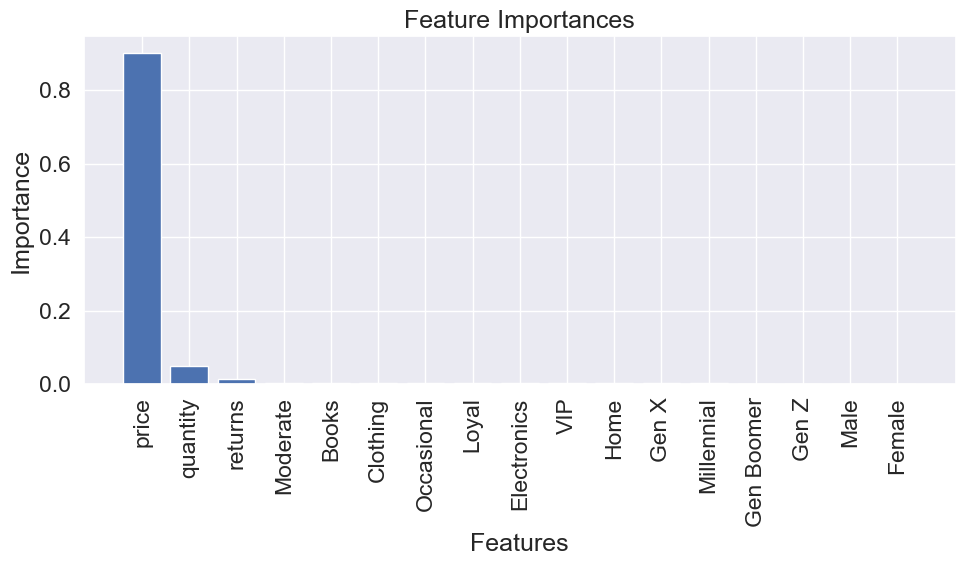

In [576]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

#### SMOTE

In [577]:
from imblearn.over_sampling import SMOTE

In [578]:
X = df.drop("churn", axis=1)
y = df.churn

In [579]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

/opt/anaconda3/envs/midproject/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/envs/midproject/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [580]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

In [581]:
y.value_counts()

churn
0    162040
1     40364
Name: count, dtype: int64

In [582]:
y_sm.value_counts()

churn
0    162040
1    162040
Name: count, dtype: int64

In [583]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [584]:
predictions = model.predict(X_test)

In [585]:
smote_rslt = print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80     48791
           1       0.79      0.81      0.80     48433

    accuracy                           0.80     97224
   macro avg       0.80      0.80      0.80     97224
weighted avg       0.80      0.80      0.80     97224



Resampling:

In [586]:
from sklearn.utils import resample

In [587]:
train = pd.concat([X_train, y_train], axis=1)

In [588]:
no_churn = train[train['churn']==0]
churn = train[train['churn']==1]

In [589]:
display(no_churn.shape)
display(churn.shape)

(113249, 18)

(113607, 18)

In [590]:
oversampled_churn = resample(churn,
                                replace=True,  
                                n_samples=len(no_churn),  
                                random_state=42)  

In [591]:
display(no_churn.shape)
display(oversampled_churn.shape)

(113249, 18)

(113249, 18)

In [592]:
train_oversampled = pd.concat([no_churn, oversampled_churn])


In [593]:
X_train = train_oversampled.drop('churn',axis = 1).copy()
y_train = train_oversampled['churn'].copy()

In [594]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [595]:
predictions_resample_aftsmt = model.predict(X_test)

In [596]:
print(classification_report(y_test, predictions_resample_aftsmt))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81     48791
           1       0.82      0.78      0.80     48433

    accuracy                           0.80     97224
   macro avg       0.80      0.80      0.80     97224
weighted avg       0.80      0.80      0.80     97224



In [597]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.8034435941742779
Train data accuracy:  0.9772801525841288


In [598]:
cm = confusion_matrix(y_test, predictions)

<Figure size 800x600 with 0 Axes>

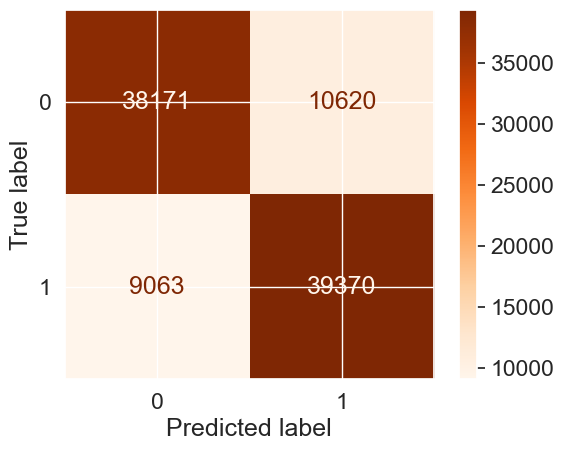

In [599]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

### Decision Tree

In [600]:
from sklearn.tree import DecisionTreeClassifier

In [601]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [602]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.56      0.55      0.56     48791
           1       0.56      0.56      0.56     48433

    accuracy                           0.56     97224
   macro avg       0.56      0.56      0.56     97224
weighted avg       0.56      0.56      0.56     97224



In [603]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

In [604]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [605]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.56      0.63      0.59     48791
           1       0.57      0.49      0.53     48433

    accuracy                           0.56     97224
   macro avg       0.56      0.56      0.56     97224
weighted avg       0.56      0.56      0.56     97224



### XGBOOST

In [606]:
import xgboost as xgb

In [607]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

In [608]:
model = xgb.XGBClassifier()


In [609]:
model.fit(X_train, y_train)


/opt/anaconda3/envs/midproject/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [610]:
predictions = model.predict(X_test)


In [611]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.71      0.99      0.83     48791
           1       0.98      0.59      0.74     48433

    accuracy                           0.79     97224
   macro avg       0.84      0.79      0.78     97224
weighted avg       0.84      0.79      0.78     97224



## Encoding some of the features to see any difference

In [612]:
df_noencd.head()

,customer_id,purchase_date,category,price,quantity,total_purchase_amount,payment_method,customer_age,returns,gender,churn,customer_generation,buyer_type
0,46251,2020-09-08,Electronics,12,3,740,Credit Card,37,0,Male,0,Millennial,Occasional
1,46251,2022-03-05,Home,468,4,2739,PayPal,37,0,Male,0,Millennial,Loyal
2,46251,2022-05-23,Home,288,2,3196,PayPal,37,0,Male,0,Millennial,Loyal
3,46251,2020-11-12,Clothing,196,1,3509,PayPal,37,0,Male,0,Millennial,Loyal
4,13593,2020-11-27,Home,449,1,3452,Credit Card,49,0,Female,1,Gen X,Loyal


In [613]:
df2 = df_noencd.drop(columns=["customer_id","purchase_date","category","total_purchase_amount","customer_age","gender"])

In [614]:
df2["buyer_type"].unique()

['Occasional', 'Loyal', 'Moderate', 'VIP']
Categories (4, object): ['Occasional' < 'Moderate' < 'Loyal' < 'VIP']

In [615]:
buyer_type_toplot = df2["buyer_type"].value_counts()

In [616]:
df2.to_excel("df2.xlsx")

In [617]:
buyer_encode={
    "Occasional": 1,
    "Moderate": 2,
    "Loyal": 3,
    "VIP": 4
}
df2["buyer_type"] = df2["buyer_type"].map(buyer_encode)

In [618]:
df2.head() #we can try from here to run same models and see how this reacts

,price,quantity,payment_method,returns,churn,customer_generation,buyer_type
0,12,3,Credit Card,0,0,Millennial,1
1,468,4,PayPal,0,0,Millennial,3
2,288,2,PayPal,0,0,Millennial,3
3,196,1,PayPal,0,0,Millennial,3
4,449,1,Credit Card,0,1,Gen X,3


In [619]:
df3 = df2.copy()

NEW

In [620]:
df2 = df2.drop(columns= ["payment_method","customer_generation"])

In [621]:
df2.corrwith(df['churn'], method='spearman').sort_values(ascending=False)

churn         1.000000
buyer_type    0.002293
returns       0.001863
quantity     -0.002051
price        -0.003308
dtype: float64

split x/y

In [622]:
X2 = df.drop("churn", axis= 1)
y2 = df.churn

In [623]:

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [624]:
model = RandomForestClassifier()

model.fit(X_train, y_train)


RandomForestClassifier()

In [625]:
predictions_rf_nosmt = model.predict(X_test)


In [626]:
print(classification_report(y_test, predictions_rf_nosmt))


              precision    recall  f1-score   support

           0       0.80      0.83      0.81     48454
           1       0.20      0.17      0.19     12268

    accuracy                           0.70     60722
   macro avg       0.50      0.50      0.50     60722
weighted avg       0.68      0.70      0.69     60722



In [627]:
feature_names2 = list(X_train.columns)
importances2 = model.feature_importances_
indices2 = np.argsort(importances2)[::-1]

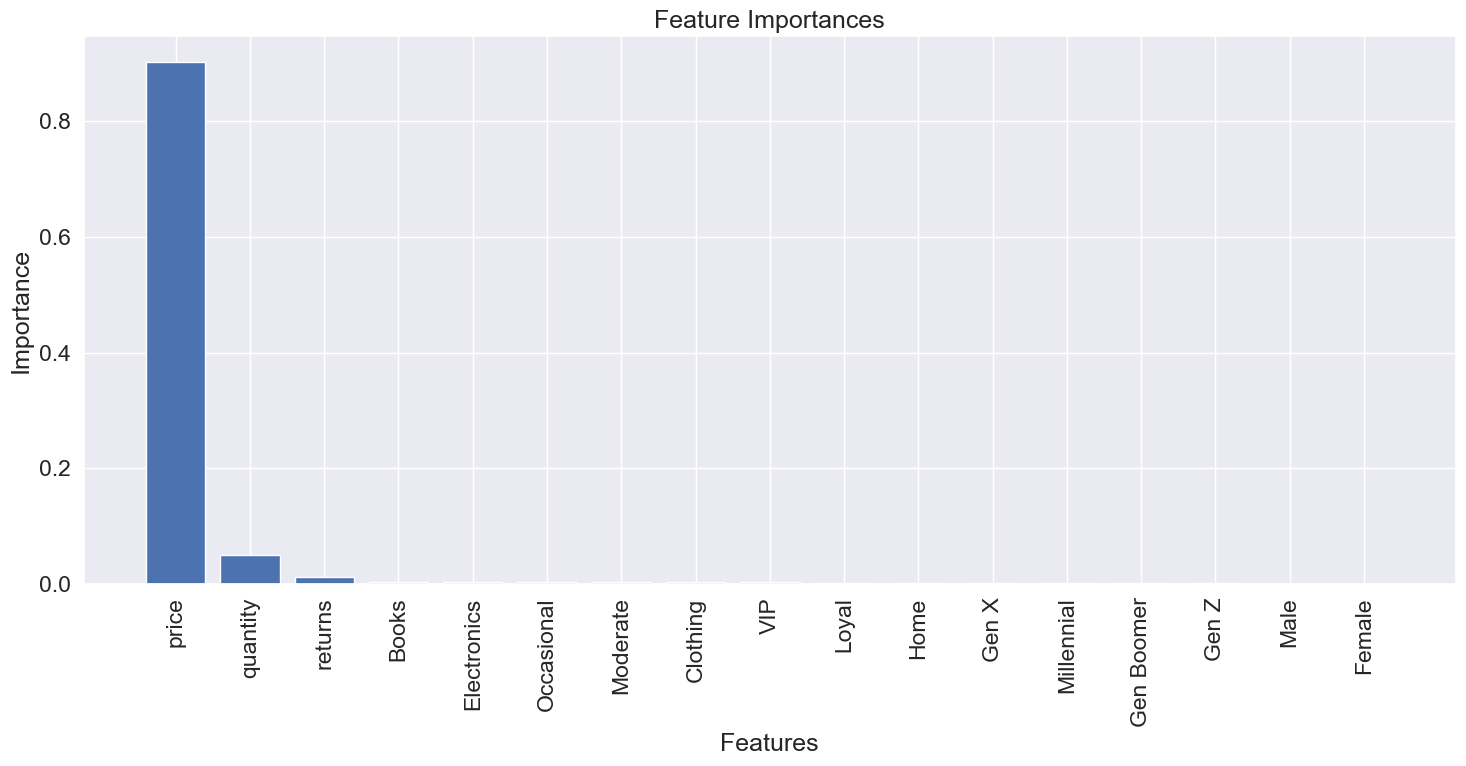

In [628]:
plt.figure(figsize=(15, 8))
plt.title("Feature Importances")
plt.bar(range(X2.shape[1]), importances2[indices2], align="center")
plt.xticks(range(X2.shape[1]), [feature_names2[i] for i in indices2], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


In [629]:
X2 = df2.drop("churn", axis=1)
y2 = df2.churn

In [630]:
X2.head()

,price,quantity,returns,buyer_type
0,12,3,0,1
1,468,4,0,3
2,288,2,0,3
3,196,1,0,3
4,449,1,0,3


In [631]:
y2.head()

0    0
1    0
2    0
3    0
4    1
Name: churn, dtype: int64

In [632]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X2, y2)

/opt/anaconda3/envs/midproject/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/envs/midproject/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [633]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

In [634]:
model = RandomForestClassifier()


In [635]:
model.fit(X_train, y_train)


RandomForestClassifier()

In [636]:
predictions = model.predict(X_test)


In [637]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.65      0.57      0.61     48791
           1       0.62      0.70      0.65     48433

    accuracy                           0.63     97224
   macro avg       0.64      0.63      0.63     97224
weighted avg       0.64      0.63      0.63     97224



### XGBOOST

In [638]:
X2 = df2.drop(columns="churn", axis=1)
y2 = df2.churn

In [639]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X2, y2)

/opt/anaconda3/envs/midproject/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/envs/midproject/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [640]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

In [641]:
model = xgb.XGBClassifier()


In [642]:
model.fit(X_train, y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:buyer_type: category

## Reporting

#### Results for encoding with get_dummies and no SMOTE: 

              precision    recall  f1-score   support

           0       0.80      0.83      0.81     48454
           1       0.20      0.17      0.19     12268

    accuracy                           0.69     60722
   


### Results for enconding with get_dummies and SMOTE: 

               precision    recall  f1-score   support

           0       0.81      0.78      0.79     48791
           1       0.79      0.81      0.80     48433

    accuracy                           0.80     97224
   

### Results for enconding with get_dummies, SMOTE and Re-sample: 

              precision    recall  f1-score   support

           0       0.79      0.83      0.81     48791
           1       0.82      0.78      0.80     48433

    accuracy                           0.80     97224
  



### TomekLinks 

TomekLinks

In [ ]:
from imblearn.under_sampling import TomekLinks # Undersampling librarie technique

In [ ]:
X = df.drop("churn", axis=1)
y = df.churn

In [ ]:
tl = TomekLinks(sampling_strategy="not majority")
X_tl, y_tl = tl.fit_resample(X, y)

/opt/anaconda3/envs/midproject/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/envs/midproject/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The TomekLinks or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.3, random_state=42)

In [ ]:
y.value_counts()

churn
0    162040
1     40364
Name: count, dtype: int64

In [ ]:
y_tl.value_counts()

churn
0    142872
1     21196
Name: count, dtype: int64

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     42743
           1       0.16      0.02      0.04      6478

    accuracy                           0.86     49221
   macro avg       0.51      0.50      0.48     49221
weighted avg       0.78      0.86      0.81     49221

